In [ ]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [ ]:
train_data = pd.read_csv('/content/train_iris.csv', index_col=0)

In [ ]:
test_data = pd.read_csv('/content/test_iris.csv', index_col=0)

In [ ]:
train_data.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


In [ ]:
train_data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [ ]:
X_train = train_data.drop('species', axis=1)
y_train = train_data.species

In [ ]:
X_test = test_data.drop('species', axis=1)
y_test = test_data.species

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
X_train.head()

,sepal length,sepal width,petal length,petal width
9,4.9,3.1,1.5,0.1
57,4.9,2.4,3.3,1.0
42,4.4,3.2,1.3,0.2
91,6.1,3.0,4.6,1.4
107,7.3,2.9,6.3,1.8


In [ ]:
max_depth_values = range(1, 100)
result_scores = pd.DataFrame()
np.random.seed(0)

for max_depth in max_depth_values:
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  test_score = clf.score(X_test, y_test)

  #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

  scores = pd.DataFrame({'max_depth': [max_depth],
                         'train_score': [train_score],
                         #'cross_val_score': [mean_cross_val_score],
                         'test_score': [test_score]})
  print(scores)
  result_scores = result_scores.append(scores)


In [ ]:
result_scores_long = pd.melt(result_scores, id_vars='max_depth', value_vars=['train_score', 'test_score'],
                             var_name='set_type', value_name='score')

<Axes: xlabel='max_depth', ylabel='score'>

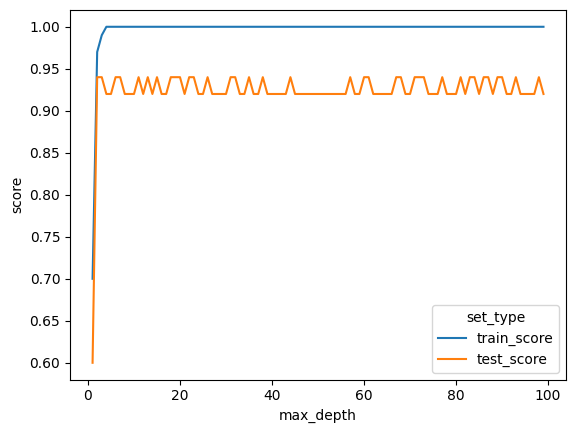

In [ ]:
sns.lineplot(x="max_depth", y="score", hue='set_type', data=result_scores_long)